In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [2]:
path = '/media/julien/Transcend/Beleg/results/histories'

In [3]:
with open(os.path.join(path, 'history_adam_100_MMAE.p'), 'rb') as file:
    adam = pickle.load(file)
with open(os.path.join(path, 'history_sgd_100_MMAE.p'), 'rb') as file:
    sgd = pickle.load(file)
with open(os.path.join(path, 'history_rmsprop_100_MMAE.p'), 'rb') as file:
    rms = pickle.load(file)
with open(os.path.join(path, 'sgd_60.json'), 'r') as file:
    sgd_old = json.load(file)

In [30]:
sgd_old_adapted = [(value[2]/4) for value in sgd_old]

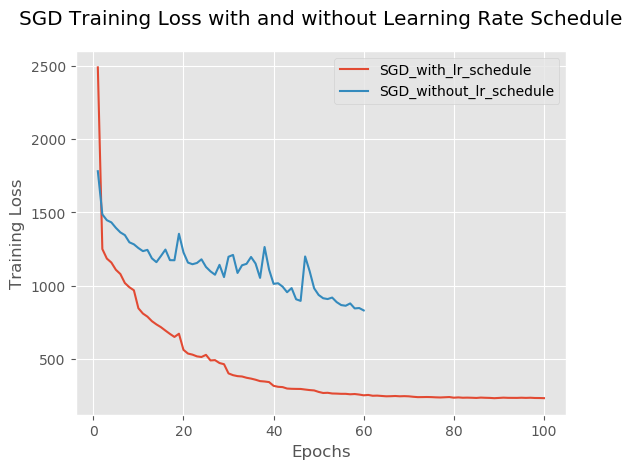

In [49]:
sgd_old[0][2]
N = np.arange(1, len(sgd["loss"])+1)
M = np.arange(1, len(sgd_old_adapted)+1)
plt.style.use("ggplot")
fig, axs= plt.subplots(1)
axs.plot(N, sgd["loss"], label="SGD_with_lr_schedule")
axs.plot(M, sgd_old_adapted, label="SGD_without_lr_schedule")
axs.set_yscale('linear')
axs.set_ylabel('Training Loss')
axs.set_xlabel('Epochs')
axs.legend()
axs.set_title("SGD Training Loss with and without Learning Rate Schedule", y=1.05)
plt.tight_layout()
plt.savefig('sgd_learning_rate_schedule_difference.png')#, bbox=tight_layout)

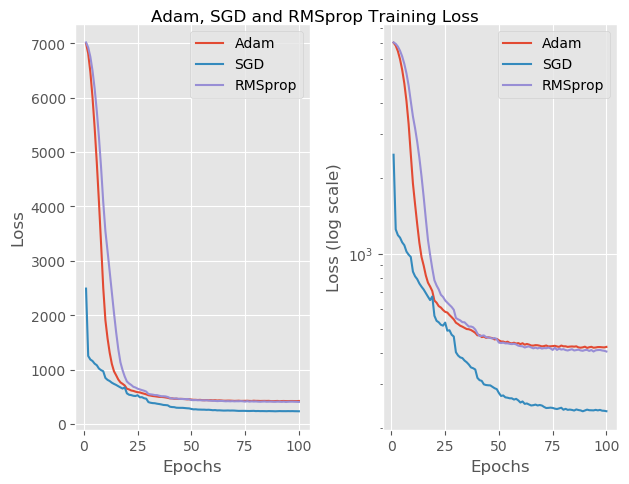

In [37]:
N = np.arange(1,len(adam["loss"])+1)
plt.style.use("ggplot")
fig, axs = plt.subplots(1,2)
axs[0].plot(N, adam["loss"], label="Adam")
axs[0].plot(N, sgd["loss"], label="SGD")
axs[0].plot(N, rms["loss"], label="RMSprop")
axs[0].set_yscale('linear')
axs[0].set_ylabel('Loss')
axs[1].plot(N, adam["loss"], label="Adam")
axs[1].plot(N, sgd["loss"], label="SGD")
axs[1].plot(N, rms["loss"], label="RMSprop")
axs[1].set_yscale('log')
axs[1].set_ylabel('Loss (log scale)')
for ax in axs.flat:
    ax.legend()
    ax.set(xlabel='Epochs')
    #ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
#axes.set_ylim([0,8000])
#axes.set_yscale('log')
#plt.legend()
plt.tight_layout()
fig.suptitle("Adam, SGD and RMSprop Training Loss", y=1)
plt.savefig("train_loss_MRMSE")

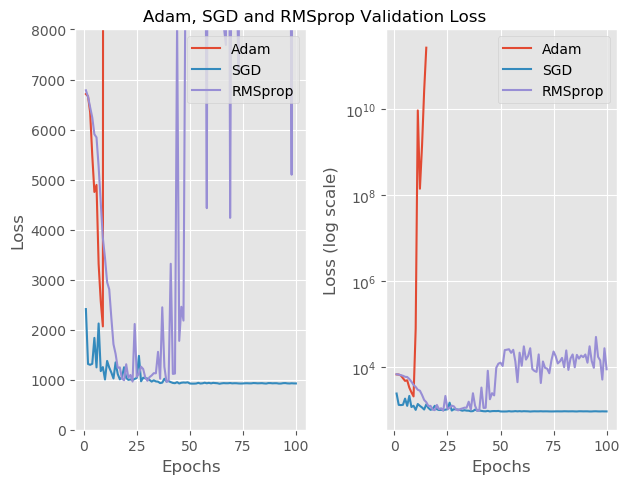

In [20]:
N = np.arange(1,len(adam["loss"])+1)
plt.style.use("ggplot")
fig, axs = plt.subplots(1,2)
axs[0].plot(N, adam["val_loss"], label="Adam")
axs[0].plot(N, sgd["val_loss"], label="SGD")
axs[0].plot(N, rms["val_loss"], label="RMSprop")
axs[0].set_yscale('linear')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0,8000])
axs[1].plot(N, adam["val_loss"], label="Adam")
axs[1].plot(N, sgd["val_loss"], label="SGD")
axs[1].plot(N, rms["val_loss"], label="RMSprop")
axs[1].set_yscale('log')
axs[1].set_ylabel('Loss (log scale)')
#axs[1].set_ylim([100,20000])
for ax in axs.flat:
    ax.legend()
    ax.set(xlabel='Epochs')
    #ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
#axs.set_yscale('log')
#plt.legend()
plt.tight_layout()
fig.suptitle("Adam, SGD and RMSprop Validation Loss", y=1)
plt.savefig("validation_loss_MRMSE")

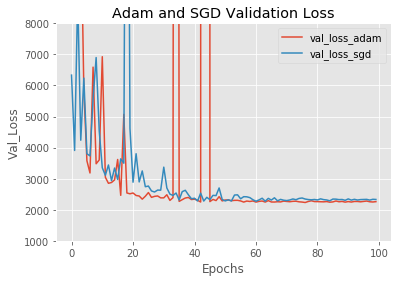

In [23]:
N = np.arange(0,len(data["val_loss"]))
plt.style.use("ggplot")
plt.figure()
axes = plt.gca()
plt.plot(N, adam["val_loss"], label="val_loss_adam")
plt.plot(N, sgd["val_loss"], label="val_loss_sgd")
plt.title("Adam and SGD Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Val_Loss")
axes.set_ylim([1000,8000])
plt.legend()
plt.savefig("val")

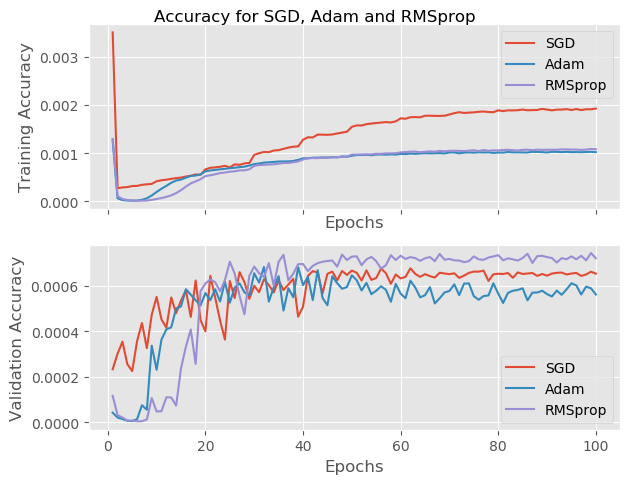

In [29]:
N = np.arange(1,len(sgd["acc"])+1)
plt.style.use("ggplot")
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(N, sgd["acc"], label="SGD")
axs[0].plot(N, adam["acc"], label="Adam")
axs[0].plot(N, rms["acc"], label="RMSprop")
axs[0].set_ylabel('Training Accuracy')
axs[1].plot(N, sgd["val_acc"], label="SGD")
axs[1].plot(N, adam["val_acc"], label="Adam")
axs[1].plot(N, rms["val_acc"], label="RMSprop")
axs[1].set_ylabel('Validation Accuracy')
for ax in axs.flat:
    ax.set(xlabel="Epochs")
    ax.legend()
#plt.legend()
plt.tight_layout()
fig.suptitle('Accuracy for SGD, Adam and RMSprop', y=1.0)
plt.savefig('accuracy_MMAE')


No handles with labels found to put in legend.


Text(0.5, 0.98, 'Adam, SGD and RMSprop MMAE vs MAE')

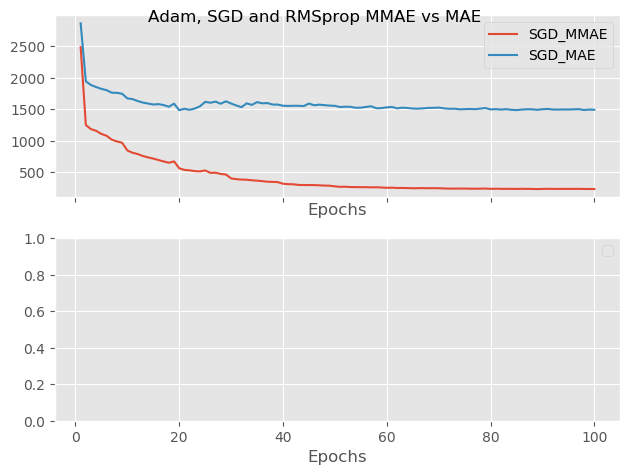

In [34]:
N = np.arange(1, len(sgd["Masked_Mean_Absolute_Error"])+1)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1, sharex=True)
axs[0].plot(N, sgd["Masked_Mean_Absolute_Error"], label="SGD_MMAE")
axs[0].plot(N, sgd["mean_absolute_error"], label="SGD_MAE")
#axs[0].plot(N, adam["Masked_Mean_Absolute_Error"], label="Adam_MMAE")
#axs[0].plot(N, adam["mean_absolute_error"], label="Adam_MAE")
#axs[0].plot(N, rms["Masked_Mean_Absolute_Error"], label="RMSprop_MMAE")
#axs[0].plot(N, rms["mean_absolute_error"], label="RMSprop_MAE")
#axs[0].set_ylabel('Training Loss (linear scale)')
#axs[1].plot(N, sgd["Masked_Mean_Absolute_Error"], label="SGD_MMAE")
#axs[1].plot(N, sgd["mean_absolute_error"], label="SGD_MAE")
#axs[1].plot(N, adam["Masked_Mean_Absolute_Error"], label="Adam_MMAE")
#axs[1].plot(N, adam["mean_absolute_error"], label="Adam_MAE")
#axs[1].plot(N, rms["Masked_Mean_Absolute_Error"], label="RMSprop_MMAE")
#axs[1].plot(N, rms["mean_absolute_error"], label="RMSprop_MAE")
#axs[1].set_ylabel('Training Loss (log scale)')
for ax in axs.flat:
    ax.set(xlabel="Epochs")
    ax.legend()
plt.tight_layout()
fig.suptitle('Adam, SGD and RMSprop MMAE vs MAE')